# National Tsing Hua University Robust and Stochastic Portfolio Optimization (Fall 2021)

 - Week 2 Programming HW


In [1]:
# basic
import numpy as np 
import pandas as pd
import datetime as dt 

# yahoo data source
from pandas_datareader import  data as pdr 

# optimization package
import cvxpy as cp 
from scipy.optimize import minimize
from scipy.spatial import ConvexHull, convex_hull_plot_2d

# matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# Problem 2.3 (Covex Hull)

1.(Warm Up)

Let 

$$ e1 := [1,0]^T $$
       
$$ e2 := [0,1]^T $$ 

Sketch,via Programming the Convex Hull

$$ A = conv ( { e_{1},e_{2},-e_{1},-e_{2} } ) $$

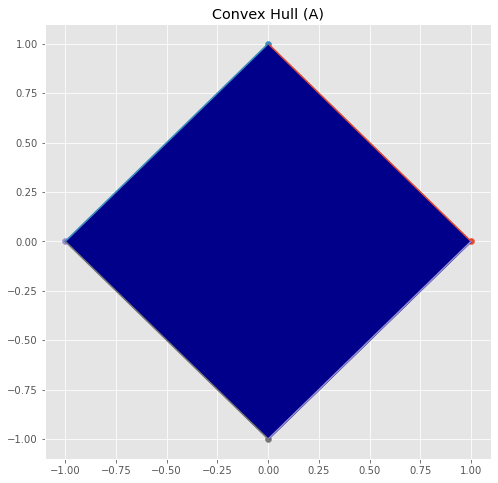

In [2]:
vector_e1 = np.array([1,0])
vector_e2 = np.array([0,1])

points = np.array([ vector_e1, vector_e2, -vector_e1, -vector_e2 , vector_e1])


fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Convex Hull (A)')
ax.scatter(vector_e1 [0],vector_e1 [1])
ax.scatter(vector_e2 [0],vector_e2 [1])
ax.scatter( -vector_e1 [0], -vector_e1 [1])
ax.scatter( -vector_e2 [0], -vector_e2 [1])

ax.plot(vector_e1,vector_e2)
ax.plot(-vector_e1,vector_e2)
ax.plot(vector_e1,-vector_e2)
ax.plot(-vector_e1,-vector_e2)

plt.fill_between(points[:,0], points[:,1],color='darkblue')

Compare your Answer with the set 

$$ B:= { x \in R^n : ||x||_{1} <= 1 } $$

Comment Your Findings

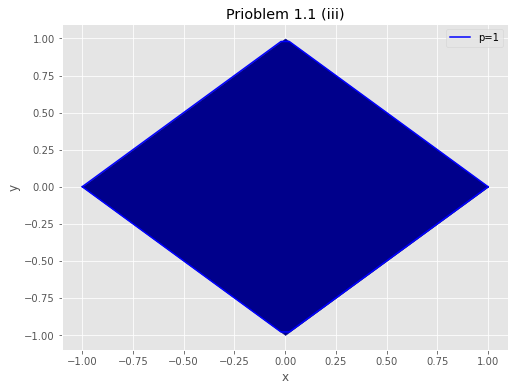

In [3]:
x = np.linspace(-1,1)

lp1_1 = [ 1-np.abs(element) for element in x ]
lp1_2 = [np.abs(element)-1  for element in x ]


fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Prioblem 1.1 (iii)')

# p = 1 
ax.plot(x,lp1_1,color='b',label='p=1')
ax.plot(x,lp1_2,color='b')
plt.fill_between(points[:,0], points[:,1],color='darkblue')

# ------
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

Comparison Between A & B is the Same 

In [4]:
class Company_Data():
    """
    ticker     --> list (str)
    start ,end --> datetime 
    peirods    --> string
    """
    def __init__(self,tickers,start,end,periods):

        self.start   = start 
        self.end     = end 
        self.tickers = tickers
        self.periods = periods
    
    def get_data(self,ticker):

        self.df = pdr.get_data_yahoo(ticker,self.start,self.end).reset_index()
   
        return self.df 
    
    def Address_Date(self,date):
        
        date = str(date)
        return date[:10]
        
    def get_price_data(self):

        for i , ticker in enumerate(self.tickers) : 
            
            if i == 0 :
                Price_DF = self.get_data(ticker)
                Price_DF = Price_DF[['Date','Adj Close']]
                Price_DF.columns = ['Date',str(ticker)]
            else:
                Merge_DF = self.get_data(ticker)[['Date','Adj Close']]
                Merge_DF.columns = ['Date',str(ticker)]
                Price_DF = Price_DF.merge(Merge_DF,how='outer')
        
        Price_DF = Price_DF.fillna(value=0)
        Price_DF['Date'] = Price_DF.apply(lambda x : self.Address_Date(x['Date']),axis=1)
        Price_DF.index = Price_DF['Date']
        Price_DF = Price_DF.drop(['Date'],axis=1)
        return Price_DF


# ------------ Company_DF parameters ------------ 
start   = dt.datetime(2019,1,2)
end     = dt.datetime(2020,1,2)
tickers = ["FB","MSFT","AAPL","AMZN","NFLX",'GOOG','TSLA','AMD','^DJI','JPM']

# ------------ ------------ ------------ ------------ 
Company_Price = Company_Data(tickers=tickers,start=start,end=end,periods="Daily")
Stock_DF      = Company_Price.get_price_data()
Stock_DF

,FB,MSFT,AAPL,AMZN,NFLX,GOOG,TSLA,AMD,^DJI,JPM
Date,,,,,,,,,,
2019-01-02,135.679993,97.961319,38.382229,1539.130005,267.660004,1045.849976,62.023998,18.830000,23346.240234,90.652061
2019-01-03,131.740005,94.357513,34.559078,1500.280029,271.200012,1016.059998,60.071999,17.049999,22686.220703,89.363731
2019-01-04,137.949997,98.746017,36.034378,1575.390015,297.570007,1070.709961,63.537998,19.000000,23433.160156,92.658173
2019-01-07,138.050003,98.871964,35.954166,1629.510010,315.339996,1068.390015,66.991997,20.570000,23531.349609,92.722595
2019-01-08,142.529999,99.588852,36.639565,1656.579956,320.269989,1076.280029,67.070000,20.750000,23787.449219,92.547752
...,...,...,...,...,...,...,...,...,...,...
2019-12-26,207.789993,155.986465,71.520905,1868.770020,332.630005,1360.400024,86.188004,46.630001,28621.390625,130.880966
2019-12-27,208.100006,156.271561,71.493759,1869.800049,329.089996,1351.890015,86.075996,46.180000,28645.259766,130.975128
2019-12-30,204.410004,154.924713,71.918091,1846.890015,323.309998,1336.140015,82.940002,45.520000,28462.140625,130.495071


-----------------------------------------
      Unbiased_Std  Expected Returns
FB        0.277528          0.474205
MSFT      0.198878          0.497561
AAPL      0.262154          0.693153
AMZN      0.229362          0.235876
NFLX      0.346693          0.268790
GOOG      0.242219          0.297267
TSLA      0.488970          0.447125
AMD       0.542295          1.102394
^DJI      0.124826          0.220194
JPM       0.186850          0.399524
-----------------------------------------


Text(0.5, 0, 'Std')

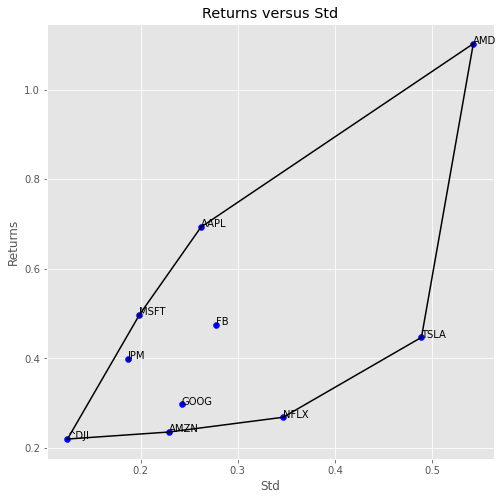

In [5]:
Expected_Return   = Stock_DF.pct_change().mean() * 252
Unbiased_Std      = Stock_DF.pct_change().std() * np.sqrt(252)


CovexHull_DF = pd.DataFrame({
    "Unbiased_Std" : Unbiased_Std ,
    "Expected Returns" : Expected_Return ,
    })

CovexHull_Dataset = CovexHull_DF.values
hull   = ConvexHull(CovexHull_Dataset)

print("-----------------------------------------")
print(CovexHull_DF)
print("-----------------------------------------")

# Figure
fig,ax = plt.subplots(figsize=(8,8))
ax.set_title('Returns versus Std')
ax.scatter(Unbiased_Std,Expected_Return,color='blue')

for i in range(Expected_Return.shape[0]):
    ax.annotate(Stock_DF.columns[i],xy=(Unbiased_Std[i],Expected_Return[i]))

for simplex in hull.simplices:
    plt.plot(CovexHull_Dataset[simplex, 0], CovexHull_Dataset[simplex, 1], 'k-')

ax.set_ylabel('Returns')
ax.set_xlabel('Std')

# Problem 2.4 (Constrainde Quadratic Programming)

Consider the Following Constrained QQP Problem 


$$ Max f(x) =  u^Tw -  \gamma  * (1/2)w^T Σ w  $$

s.t. $$ \sum_{i=1}^{n}|w_i| <= 2 $$ 

$$ |w_i|  <= 0.2 $$ 

$$ i = 1,2,.....,10 $$

where $$ \gamma =[0,1] $$ 
is Risk Aversion Constant

try $$ \gamma = {0.01,0.5,0.99} $$

and justify your anwser



Risk Aversion Parameters  $ \gamma $ 有點像是在考慮 portfolio risk 的多寡 , 

若 $ \gamma $ 越大表 investor 對於 portfolio 的 risk 考慮相對越重 , 反之亦然 .
  

In [6]:
class CVX_Markowitz_Optimization():
    
    def __init__(self,u,gamma,cov):

        self.u      = u
        self.cov    = cov 
        self.gamma  = gamma
        self.params = cp.Variable(cov.shape[1])

    def constraint_1(self):
        
        return cp.norm(self.params,1) <= 2 # Weights Norm 1 
    
    def constraint_2(self):

        bound = [ cp.abs(self.params[i]) <= 0.2 for i in range(self.cov.shape[1]) ] # weights Bound Constriants

        return bound 

    def Optimize(self):

        constraints = []
        constraints.extend( [self.constraint_1()] )
        constraints.extend( self.constraint_2()  )
        
        Objective_Function = u.T @ self.params  - (1/2) * self.gamma *  cp.quad_form(self.params ,self.cov) 

        prob  = cp.Problem( cp.Maximize(Objective_Function) , constraints )
        
        return prob , self.params


Cov_Matrix = Stock_DF.pct_change().cov() * np.sqrt(252)
u          = Expected_Return.values 
sigma      = Unbiased_Std.values 

In [7]:
Model  = CVX_Markowitz_Optimization(cov=Cov_Matrix,u=u,gamma=0.01)
gamma_1_Result,gamma_1_Params = Model.Optimize()
print("Max F(x) : "       , gamma_1_Result.solve()         )
print("Weights Values : " , gamma_1_Params.value           )
print("Weights Sum    : " , np.sum(gamma_1_Params.value)   )

Max F(x) :  0.9271447840390366
Weights Values :  [0.19999514 0.19999144 0.19997847 0.20001775 0.20000628 0.20001931
 0.19999518 0.19999199 0.20000974 0.19999465]
Weights Sum    :  1.9999999558311656


In [8]:
Model  = CVX_Markowitz_Optimization(cov=Cov_Matrix,u=u,gamma=0.5)
gamma_2_Result,gamma_2_Params = Model.Optimize()
print("Max F(x) : "       , gamma_2_Result.solve()         )
print("Weights Values : " , gamma_2_Params.value           )
print("Weights Sum    : " , np.sum(gamma_2_Params.value)   )

Max F(x) :  0.9246190474143973
Weights Values :  [0.20002725 0.20003699 0.19995753 0.19998573 0.20002659 0.19995209
 0.20000424 0.20001353 0.19997342 0.20002275]
Weights Sum    :  2.000000124949627


In [9]:
Model  = CVX_Markowitz_Optimization(cov=Cov_Matrix,u=u,gamma=0.99)
gamma_3_Result,gamma_3_Params = Model.Optimize()
print("Max F(x) : "       , gamma_3_Result.solve()         )
print("Weights Values : " , gamma_3_Params.value           )
print("Weights Sum    : " , np.sum(gamma_3_Params.value)   )

Max F(x) :  0.9220559344728312
Weights Values :  [0.20002237 0.20003619 0.19997246 0.19999399 0.20001523 0.19995981
 0.20000085 0.20000176 0.199973   0.20002432]
Weights Sum    :  1.9999999629314043


Suppose that you have 100 dollar as your inital account value , 

use the optimal $ w^* $ you obtained earily to trade the smae 10 assets on the next month iwht period from 

2020.01.02 to 2020.02.01. , Is yout optimal weight working well in the case ? 

comment on your findings.  

In [10]:
start   = dt.datetime( 2020,1,2   )
end     = dt.datetime( 2020,2,1   )
tickers = ["FB","MSFT","AAPL","AMZN","NFLX",'GOOG','TSLA','AMD','^DJI','JPM']

# ------------ ------------ ------------ ------------ 
Company_Price = Company_Data(tickers=tickers,start=start,end=end,periods="Daily")
Stock_DF      = Company_Price.get_price_data()
Stock_DF

,FB,MSFT,AAPL,AMZN,NFLX,GOOG,TSLA,AMD,^DJI,JPM
Date,,,,,,,,,,
2020-01-02,209.779999,157.903458,74.096458,1898.010010,329.809998,1367.369995,86.052002,49.099998,28868.800781,132.810699
2020-01-03,208.669998,155.937286,73.376083,1874.969971,325.899994,1360.660034,88.601997,48.599998,28634.880859,131.058090
2020-01-06,212.600006,156.340363,73.960762,1902.880005,335.829987,1394.209961,90.307999,48.389999,28703.380859,130.953857
2020-01-07,213.059998,154.914886,73.612915,1906.859985,330.750000,1393.339966,93.811996,48.250000,28583.679688,128.727570
2020-01-08,215.220001,157.382416,74.797073,1891.969971,339.260010,1404.319946,98.428001,47.830002,28745.089844,129.731781
2020-01-09,218.300003,159.348618,76.385834,1901.050049,335.660004,1419.829956,96.267998,48.970001,28956.900391,130.205460
2020-01-10,218.059998,158.611298,76.558510,1883.160034,329.049988,1429.729980,95.629997,48.169998,28823.769531,128.907578
2020-01-13,221.910004,160.518478,78.194145,1891.300049,338.920013,1439.229980,104.972000,48.750000,28907.050781,129.978073
2020-01-14,219.059998,159.387955,77.138275,1869.439941,338.690002,1430.880005,107.584000,48.209999,28939.669922,131.493881


# Market Values Compares

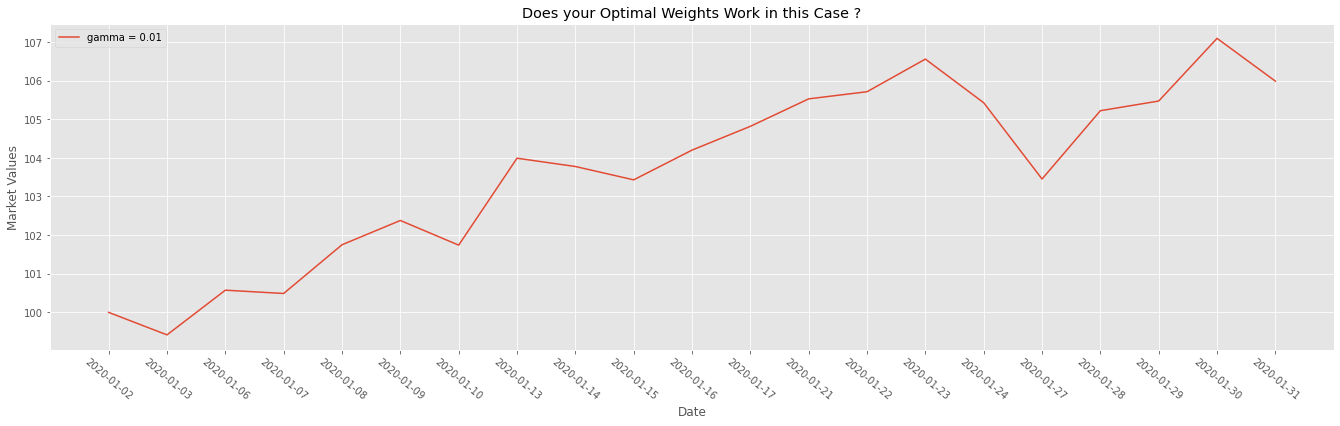

In [11]:
gamm_1_units        = ( 100 * gamma_1_Params.value ) / Stock_DF.iloc[0]
gamm_2_units        = ( 100 * gamma_2_Params.value ) / Stock_DF.iloc[0]
gamm_3_units        = ( 100 * gamma_3_Params.value ) / Stock_DF.iloc[0]



gamm_1_portfolio_market_values = Stock_DF @ gamm_1_units / 2
gamm_2_portfolio_market_values = Stock_DF @ gamm_2_units / 2 
gamm_3_portfolio_market_values = Stock_DF @ gamm_3_units / 2 


fig , ax = plt.subplots(figsize=(23,6))


ax.set_title('Does your Optimal Weights Work in this Case ?')
ax.plot(Stock_DF.index   ,  gamm_1_portfolio_market_values        , label='gamma = 0.01'  )

ax.set_ylabel('Market Values')
plt.xticks(rotation=-40)
ax.set_xlabel('Date')
ax.legend()

# Cumulative Returns 

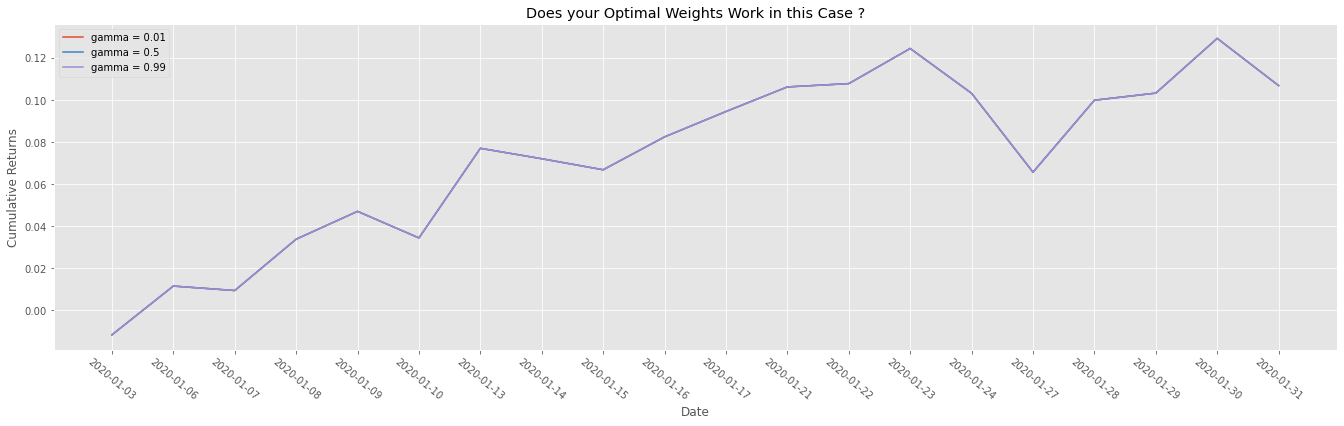

In [12]:
Gamma_1_Returns = np.cumsum( Stock_DF.pct_change().dropna() @ gamma_1_Params.value )
Gamma_2_Returns = np.cumsum( Stock_DF.pct_change().dropna() @ gamma_2_Params.value )
Gamma_3_Returns = np.cumsum( Stock_DF.pct_change().dropna() @ gamma_3_Params.value )


fig , ax = plt.subplots(figsize=(23,6))


ax.set_title('Does your Optimal Weights Work in this Case ?')
ax.plot(Stock_DF.pct_change().dropna().index ,  Gamma_1_Returns ,label='gamma = 0.01')
ax.plot(Stock_DF.pct_change().dropna().index ,  Gamma_2_Returns ,label='gamma = 0.5')
ax.plot(Stock_DF.pct_change().dropna().index ,  Gamma_3_Returns ,label='gamma = 0.99')


ax.set_ylabel('Cumulative Returns')
plt.xticks(rotation=-40)
ax.set_xlabel('Date')
ax.legend()

# In the Above Two Figures , I do not think the Optimal Solution Wights outer perform  ,which mean it doesn't work !  

# 2-5 

Let

$$
f(x)  = x^TQx + 2b^Tx+c
$$

and the Set 

$$ E :={ x \in R^n : f(x) \leq  0 } $$

Where

$$ Q =  \left[ \begin{array} {cccc}
1  &  1    \\
0  &  1/2  \\
\end{array} \right] $$


$$ b =  \left[ \begin{array} {cccc}
1  &  -(1/2)    \\
\end{array} \right]^T $$

$$ c=1 $$


$$ f(x) = x1^2 + x2^2 + x1x2 + x1 - (1/2)x2 + 1 $$


(-3.0, 10.0)

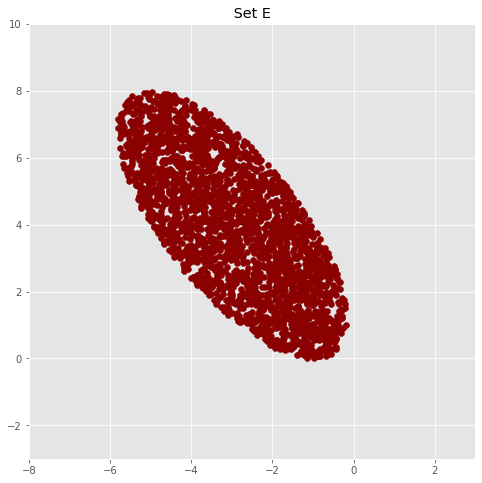

In [57]:
Q = np.array( [[1,1], [0,0.5]] )
b = np.array( [1 , -0.5]       )
c = 1 


def Ellipsoid(x):

    objective_function = x.T @ Q @ x + 2 * b.T @ x + c
    
    return objective_function


x = np.random.random(100000) * 30 - 20
y = np.random.random(100000) * 30 - 20


x_list = []
y_list = []


for i in range(x.shape[0]):

    matrix = np.array([x[i],y[i]])
    
    z = Ellipsoid(matrix)

    if z  < 0 :

        x_list.append(x[i])
        y_list.append(y[i])



fig,ax = plt.subplots(figsize=(8,8))

ax.scatter(x_list,y_list,color='darkred')
ax.set_title(' Set E ')
ax.set_xlim(-8,3)
ax.set_ylim(-3,10)